In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

In [161]:
df = pd.read_excel('after_covid.xlsx')

In [17]:
mydata

,^CNX100,BRITANNIA.NS,TORNTPHARM.NS,SHREECEM.NS,HAVELLS.NS,PGHH.NS,DABUR.NS,MARICO.NS,NESTLEIND.NS
Date,,,,,,,,,
2012-03-01,5229.950195,261.825012,282.649994,2883.949951,106.610001,1936.599976,103.050003,77.926376,4377.399902
2012-03-02,5246.799805,269.200012,284.000000,2799.750000,105.940002,1940.050049,105.199997,77.951141,4419.850098
2012-03-05,5170.350098,271.174988,281.600006,2794.750000,103.650002,1950.199951,103.900002,78.669472,4458.799805
2012-03-06,5116.700195,268.674988,280.174988,2806.199951,105.180000,1951.000000,102.949997,77.901604,4462.350098
2012-03-07,5110.350098,266.200012,281.024994,2784.500000,109.339996,1962.050049,103.849998,78.074997,4422.799805
...,...,...,...,...,...,...,...,...,...
2020-03-17,9105.400391,2686.000000,1986.000000,20005.500000,569.849976,10003.950195,430.399994,249.149994,14541.000000
2020-03-18,8607.950195,2501.949951,1815.250000,19293.949219,560.000000,10039.200195,414.549988,248.850006,13536.799805
2020-03-19,8388.700195,2318.149902,1772.099976,17731.449219,535.200012,9507.000000,418.850006,248.300003,13120.299805


In [18]:
df1 = mydata['BRITANNIA.NS']
df1

Date
2012-03-01     261.825012
2012-03-02     269.200012
2012-03-05     271.174988
2012-03-06     268.674988
2012-03-07     266.200012
                 ...     
2020-03-17    2686.000000
2020-03-18    2501.949951
2020-03-19    2318.149902
2020-03-20    2467.800049
2020-03-23    2137.850098
Name: BRITANNIA.NS, Length: 1979, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(1979, 1)

In [21]:
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size, test_size

(1385, 594)

In [23]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [25]:
print(X_train)

[[0.01107338 0.01336094 0.01397354 ... 0.00704881 0.00679291 0.00611052]
 [0.01336094 0.01397354 0.01319809 ... 0.00679291 0.00611052 0.00438902]
 [0.01397354 0.01319809 0.01243041 ... 0.00611052 0.00438902 0.00359807]
 ...
 [0.48728268 0.47783776 0.47543388 ... 0.60852374 0.63465628 0.6405109 ]
 [0.47783776 0.47543388 0.45962253 ... 0.63465628 0.6405109  0.63398163]
 [0.47543388 0.45962253 0.46001798 ... 0.6405109  0.63398163 0.6456443 ]]


In [26]:
print(X_train.shape), print(y_train.shape)

(1284, 100)
(1284,)


(None, None)

In [27]:
print(X_test.shape), print(y_test.shape)

(493, 100)
(493,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [31]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


In [50]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(50,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), 
                    verbose=1, shuffle=False)

# Training Phase
model.summary()

ValueError: Input 0 of layer "lstm_8" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 100)

In [33]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 62.1469054058705
Train Root Mean Squared Error: 69.10974125993869
Test Mean Absolute Error: 72.06218851023706
Test Root Mean Squared Error: 98.567323189051


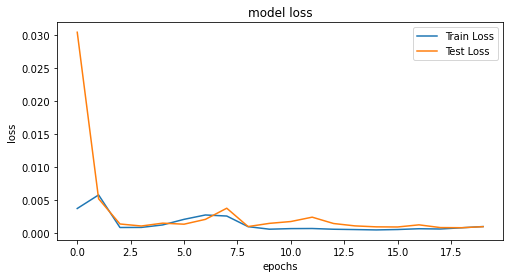

In [36]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

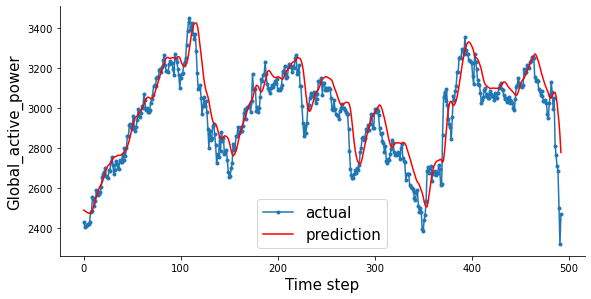

In [45]:
import seaborn as sns
aa=[x for x in range(493)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:493], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:493], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
mydata

,Date,^CNX100,BRITANNIA.NS,PGHH.NS,ASIANPAINT.NS,MARICO.NS,TCS.NS,MARUTI.NS
0,2012-03-01,5229.950195,261.825012,1936.599976,314.964996,77.926376,609.799988,1315.050049
1,2012-03-02,5246.799805,269.200012,1940.050049,315.875000,77.951141,608.625000,1330.550049
2,2012-03-05,5170.350098,271.174988,1950.199951,323.470001,78.669472,603.650024,1315.199951
3,2012-03-06,5116.700195,268.674988,1951.000000,316.045013,77.901604,601.000000,1331.599976
4,2012-03-07,5110.350098,266.200012,1962.050049,309.174988,78.074997,596.424988,1308.550049
...,...,...,...,...,...,...,...,...
2454,2022-02-22,17276.500000,3489.750000,15431.250000,3227.149902,505.350006,3586.399902,8622.799805
2455,2022-02-23,17273.449219,3511.149902,15658.250000,3237.199951,501.000000,3563.800049,8698.849609
2456,2022-02-24,16428.050781,3446.000000,15013.750000,3069.050049,483.450012,3401.649902,8210.150391
2457,2022-02-25,16872.349609,3422.750000,15491.750000,3119.199951,494.850006,3520.750000,8356.099609


Text(0.5, 1.0, 'TORNTPHARM')

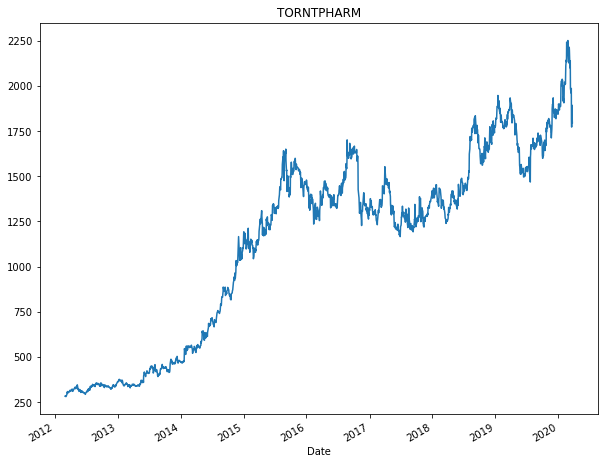

In [70]:
mydata['TORNTPHARM.NS'].plot(figsize=(10,8))
plt.title('TORNTPHARM')

In [71]:
df1 = mydata['TORNTPHARM.NS']
df1

Date
2012-03-01     282.649994
2012-03-02     284.000000
2012-03-05     281.600006
2012-03-06     280.174988
2012-03-07     281.024994
                 ...     
2020-03-17    1986.000000
2020-03-18    1815.250000
2020-03-19    1772.099976
2020-03-20    1893.900024
2020-03-23    1796.150024
Name: TORNTPHARM.NS, Length: 1979, dtype: float64

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [73]:
df1.shape

(1979, 1)

In [74]:
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [75]:
training_size, test_size

(1385, 594)

In [76]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [77]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [78]:
print(X_train)

[[1.25575857e-03 1.94071920e-03 7.23020019e-04 ... 2.02062534e-02
  1.81513870e-02 2.56224855e-02]
 [1.94071920e-03 7.23020019e-04 0.00000000e+00 ... 1.81513870e-02
  2.56224855e-02 2.62947648e-02]
 [7.23020019e-04 0.00000000e+00 4.31272654e-04 ... 2.56224855e-02
  2.62947648e-02 2.89965479e-02]
 ...
 [4.98966187e-01 4.86966734e-01 4.76870002e-01 ... 4.92573263e-01
  5.08225799e-01 5.02543213e-01]
 [4.86966734e-01 4.76870002e-01 4.79026350e-01 ... 5.08225799e-01
  5.02543213e-01 5.10585109e-01]
 [4.76870002e-01 4.79026350e-01 4.76768490e-01 ... 5.02543213e-01
  5.10585109e-01 5.32706688e-01]]


In [79]:
print(X_train.shape), print(y_train.shape)

(1284, 100)
(1284,)


(None, None)

In [80]:
print(X_test.shape), print(y_test.shape)

(493, 100)
(493,)


(None, None)

In [81]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [82]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), 
                    verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
19/19 [==============================] - 3s 92ms/step - loss: 0.0031 - val_loss: 0.0121
Epoch 2/20
19/19 [==============================] - 1s 73ms/step - loss: 0.0181 - val_loss: 0.0020
Epoch 3/20
19/19 [==============================] - 1s 74ms/step - loss: 0.0071 - val_loss: 0.0039
Epoch 4/20
19/19 [==============================] - 1s 76ms/step - loss: 0.0029 - val_loss: 0.0010
Epoch 5/20
19/19 [==============================] - 1s 70ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 6/20
19/19 [==============================] - 1s 76ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/20
19/19 [==============================] - 1s 74ms/step - loss: 0.0012 - val_loss: 9.0695e-04
Epoch 8/20
19/19 [==============================] - 1s 75ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/20
19/19 [==============================] - 1s 76ms/step - loss: 0.0013 - val_loss: 9.9773e-04
Epoch 10/20
19/19 [==============================] - 1s 73ms/step - loss: 0.0012 - val_loss: 9.4649e-

In [83]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [84]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 29.0232439367942
Train Root Mean Squared Error: 37.226352648289435
Test Mean Absolute Error: 45.690730282549445
Test Root Mean Squared Error: 60.701432810420194


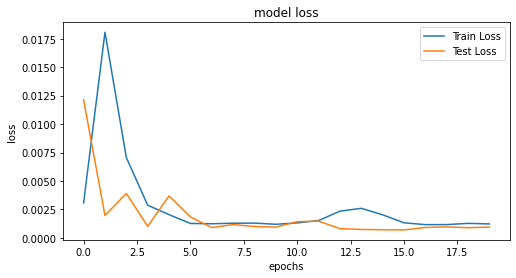

In [85]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

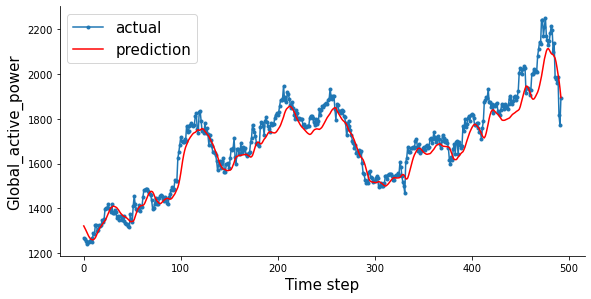

In [86]:
import seaborn as sns
aa=[x for x in range(493)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:493], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:493], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Text(0.5, 1.0, 'SHREECEM')

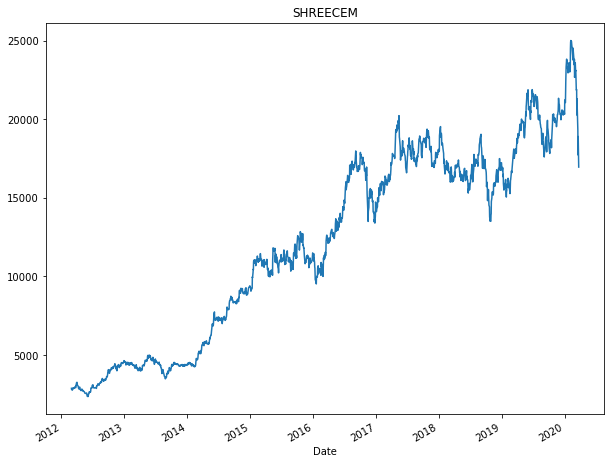

In [87]:
mydata['SHREECEM.NS'].plot(figsize=(10,8))
plt.title('SHREECEM')

In [93]:
df1 = mydata['SHREECEM.NS']
df1

Date
2012-03-01     2883.949951
2012-03-02     2799.750000
2012-03-05     2794.750000
2012-03-06     2806.199951
2012-03-07     2784.500000
                  ...     
2020-03-17    20005.500000
2020-03-18    19293.949219
2020-03-19    17731.449219
2020-03-20    18903.650391
2020-03-23    16959.400391
Name: SHREECEM.NS, Length: 1979, dtype: float64

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [90]:
df1.shape

(1979, 1)

In [91]:
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [94]:
training_size, test_size

(1385, 594)

In [95]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [97]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [100]:
print(X_train)

[[0.02322239 0.01950575 0.01928505 ... 0.02546032 0.0235049  0.02295976]
 [0.01950575 0.01928505 0.01979046 ... 0.0235049  0.02295976 0.02870687]
 [0.01928505 0.01979046 0.01883261 ... 0.02295976 0.02870687 0.02835817]
 ...
 [0.68368148 0.66418889 0.67342317 ... 0.7127944  0.71402818 0.71571872]
 [0.66418889 0.67342317 0.67409192 ... 0.71402818 0.71571872 0.726403  ]
 [0.67342317 0.67409192 0.68092044 ... 0.71571872 0.726403   0.71796549]]


In [101]:
print(X_train.shape), print(y_train.shape)

(1284, 100)
(1284,)


(None, None)

In [102]:
print(X_test.shape), print(y_test.shape)

(493, 100)
(493,)


(None, None)

In [103]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [104]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), 
                    verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
19/19 [==============================] - 3s 91ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 2/20
19/19 [==============================] - 1s 73ms/step - loss: 0.0095 - val_loss: 0.0015
Epoch 3/20
19/19 [==============================] - 1s 72ms/step - loss: 0.0082 - val_loss: 0.0087
Epoch 4/20
19/19 [==============================] - 1s 70ms/step - loss: 0.0071 - val_loss: 0.0022
Epoch 5/20
19/19 [==============================] - 1s 78ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 6/20
19/19 [==============================] - 1s 71ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 7/20
19/19 [==============================] - 1s 72ms/step - loss: 0.0012 - val_loss: 9.0494e-04
Epoch 8/20
19/19 [==============================] - 1s 73ms/step - loss: 9.9673e-04 - val_loss: 9.2214e-04
Epoch 9/20
19/19 [==============================] - 1s 73ms/step - loss: 0.0010 - val_loss: 9.0524e-04
Epoch 10/20
19/19 [==============================] - 1s 74ms/step - loss: 0.0011 - val_loss: 

In [105]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [106]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 360.6033268153111
Train Root Mean Squared Error: 455.69109254206944
Test Mean Absolute Error: 511.903328235928
Test Root Mean Squared Error: 671.3394894831865


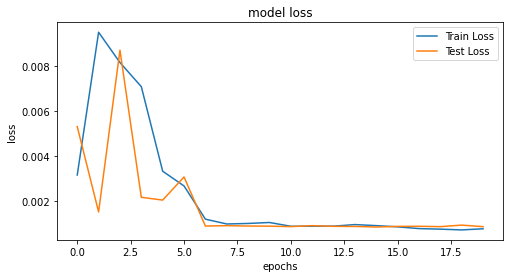

In [107]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

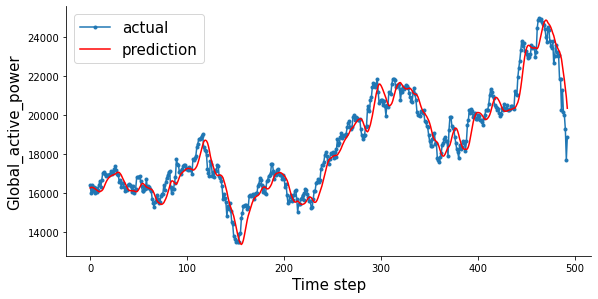

In [109]:
import seaborn as sns
aa=[x for x in range(493)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:493], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:637], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Text(0.5, 1.0, 'HAVELLS')

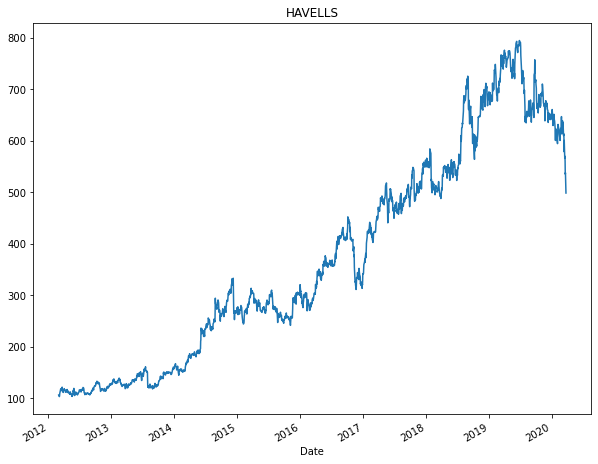

In [110]:
mydata['HAVELLS.NS'].plot(figsize=(10,8))
plt.title('HAVELLS')

In [111]:
df1 = mydata['HAVELLS.NS']

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [113]:
df1.shape

(1979, 1)

In [114]:
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [115]:
training_size, test_size

(1385, 594)

In [116]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [117]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [118]:
print(X_train)

[[0.0042852  0.00331524 0.         ... 0.02559537 0.02463988 0.02338039]
 [0.00331524 0.         0.00221498 ... 0.02463988 0.02338039 0.02154181]
 [0.         0.00221498 0.00823742 ... 0.02338039 0.02154181 0.01501266]
 ...
 [0.50155627 0.48794788 0.51625043 ... 0.61353601 0.61947155 0.63329708]
 [0.48794788 0.51625043 0.53514292 ... 0.61947155 0.63329708 0.63764019]
 [0.51625043 0.53514292 0.51545421 ... 0.63329708 0.63764019 0.64379292]]


In [119]:
print(X_train.shape), print(y_train.shape)

(1284, 100)
(1284,)


(None, None)

In [120]:
print(X_test.shape), print(y_test.shape)

(493, 100)
(493,)


(None, None)

In [121]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [122]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), 
                    verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
19/19 [==============================] - 3s 101ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 2/20
19/19 [==============================] - 2s 82ms/step - loss: 0.0046 - val_loss: 0.0011
Epoch 3/20
19/19 [==============================] - 2s 90ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/20
19/19 [==============================] - 2s 95ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 5/20
19/19 [==============================] - 2s 89ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 6/20
19/19 [==============================] - 2s 85ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7/20
19/19 [==============================] - 2s 88ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/20
19/19 [==============================] - 2s 84ms/step - loss: 0.0012 - val_loss: 9.4942e-04
Epoch 9/20
19/19 [==============================] - 2s 84ms/step - loss: 7.7539e-04 - val_loss: 9.2047e-04
Epoch 10/20
19/19 [==============================] - 2s 83ms/step - loss: 5.9841e-04 - val_loss:

In [123]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [124]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 6.8542778751931825
Train Root Mean Squared Error: 9.963364827384797
Test Mean Absolute Error: 17.86056976627867
Test Root Mean Squared Error: 23.05901880887356


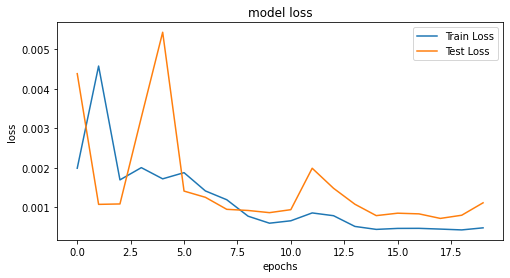

In [125]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

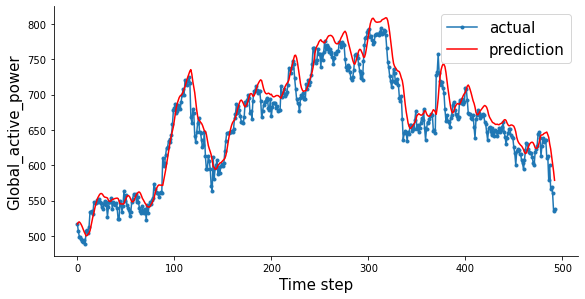

In [126]:
import seaborn as sns
aa=[x for x in range(493)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:493], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:493], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Text(0.5, 1.0, 'PGHH')

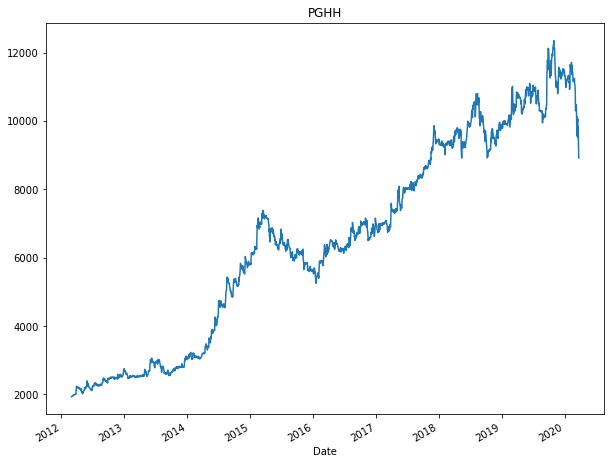

In [127]:
mydata['PGHH.NS'].plot(figsize=(10,8))
plt.title('PGHH')

In [128]:
df1 = mydata['PGHH.NS']

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [130]:
df1.shape

(1979, 1)

In [131]:
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [132]:
training_size, test_size

(1385, 594)

In [133]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [134]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [135]:
print(X_train)

[[0.00000000e+00 3.31143981e-04 1.30534911e-03 ... 3.32528756e-02
  3.23554371e-02 3.45630168e-02]
 [3.31143981e-04 1.30534911e-03 1.38213918e-03 ... 3.23554371e-02
  3.45630168e-02 3.67562086e-02]
 [1.30534911e-03 1.38213918e-03 2.44274193e-03 ... 3.45630168e-02
  3.67562086e-02 3.24370309e-02]
 ...
 [5.30999689e-01 5.22313343e-01 5.31311630e-01 ... 6.43984567e-01
  6.39161486e-01 6.46326559e-01]
 [5.22313343e-01 5.31311630e-01 5.38803032e-01 ... 6.39161486e-01
  6.46326559e-01 6.47627093e-01]
 [5.31311630e-01 5.38803032e-01 5.33428055e-01 ... 6.46326559e-01
  6.47627093e-01 6.45745888e-01]]


In [136]:
print(X_train.shape), print(y_train.shape)

(1284, 100)
(1284,)


(None, None)

In [137]:
print(X_test.shape), print(y_test.shape)

(493, 100)
(493,)


(None, None)

In [138]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [139]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), 
                    verbose=1, shuffle=False)

# Training Phase
model.summary()


Epoch 1/20
19/19 [==============================] - 3s 100ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 2/20
19/19 [==============================] - 2s 81ms/step - loss: 0.0056 - val_loss: 9.7751e-04
Epoch 3/20
19/19 [==============================] - 1s 79ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 4/20
19/19 [==============================] - 1s 79ms/step - loss: 0.0022 - val_loss: 6.5939e-04
Epoch 5/20
19/19 [==============================] - 2s 83ms/step - loss: 0.0017 - val_loss: 6.8287e-04
Epoch 6/20
19/19 [==============================] - 1s 78ms/step - loss: 9.6175e-04 - val_loss: 8.2026e-04
Epoch 7/20
19/19 [==============================] - 1s 78ms/step - loss: 7.6295e-04 - val_loss: 0.0010
Epoch 8/20
19/19 [==============================] - 1s 78ms/step - loss: 7.2597e-04 - val_loss: 6.2677e-04
Epoch 9/20
19/19 [==============================] - 2s 80ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/20
19/19 [==============================] - 2s 80ms/step - loss: 0.

In [140]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [141]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 81.09740127135656
Train Root Mean Squared Error: 118.902049805133
Test Mean Absolute Error: 200.7222660211713
Test Root Mean Squared Error: 261.959916555967


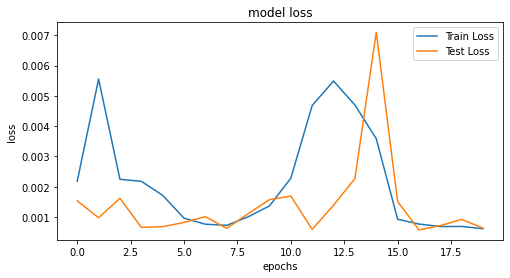

In [142]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

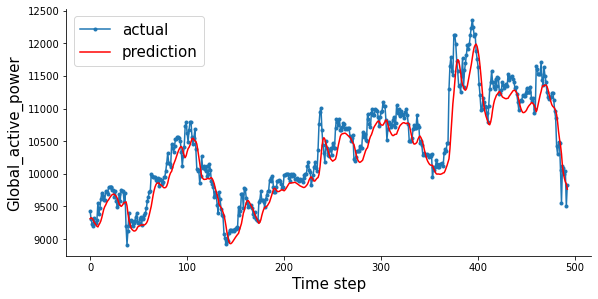

In [143]:
import seaborn as sns
aa=[x for x in range(493)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:493], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:493], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Text(0.5, 1.0, 'DABUR')

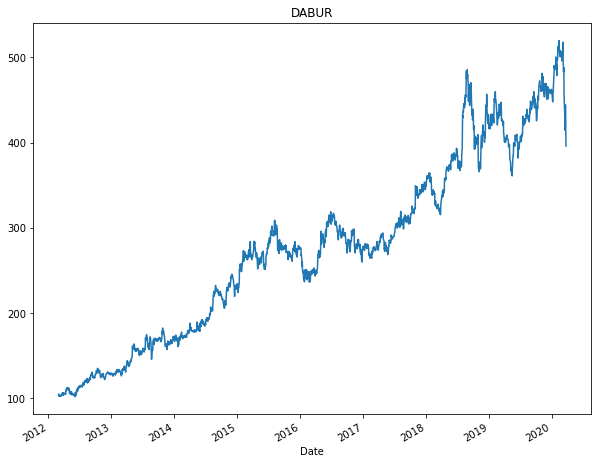

In [144]:
mydata['DABUR.NS'].plot(figsize=(10,8))
plt.title('DABUR')

In [145]:
df1 = mydata['DABUR.NS']

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [147]:
df1.shape

(1979, 1)

In [148]:
training_size = int(len(df1)*0.70)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [149]:
training_size, test_size

(1385, 594)

In [150]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [151]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [152]:
print(X_train)

[[0.0021544  0.00730101 0.00418911 ... 0.03877916 0.03758228 0.03865949]
 [0.00730101 0.00418911 0.00191501 ... 0.03758228 0.03865949 0.03243565]
 [0.00418911 0.00191501 0.00406941 ... 0.03865949 0.03243565 0.03554757]
 ...
 [0.41065231 0.39880309 0.39940153 ... 0.51609811 0.53512866 0.526152  ]
 [0.39880309 0.39940153 0.40119686 ... 0.53512866 0.526152   0.526152  ]
 [0.39940153 0.40119686 0.4223818  ... 0.526152   0.526152   0.52136445]]


In [153]:
print(X_train.shape), print(y_train.shape)

(1284, 100)
(1284,)


(None, None)

In [154]:
print(X_test.shape), print(y_test.shape)

(493, 100)
(493,)


(None, None)

In [155]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [156]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, epochs=20, batch_size=70, validation_data=(X_test, y_test), 
                    verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
19/19 [==============================] - 3s 100ms/step - loss: 0.0023 - val_loss: 0.0130
Epoch 2/20
19/19 [==============================] - 1s 80ms/step - loss: 0.0071 - val_loss: 0.0020
Epoch 3/20
19/19 [==============================] - 1s 78ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 4/20
19/19 [==============================] - 2s 80ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 5/20
19/19 [==============================] - 1s 79ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 6/20
19/19 [==============================] - 2s 79ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/20
19/19 [==============================] - 1s 79ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/20
19/19 [==============================] - 2s 79ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/20
19/19 [==============================] - 1s 79ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 10/20
19/19 [==============================] - 1s 76ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 11

In [157]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [158]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 4.448124288398529
Train Root Mean Squared Error: 5.934959289056921
Test Mean Absolute Error: 9.219303340022027
Test Root Mean Squared Error: 12.940950528013806


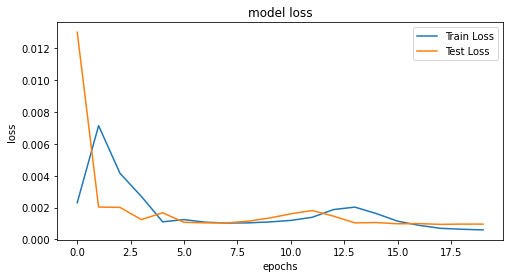

In [159]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

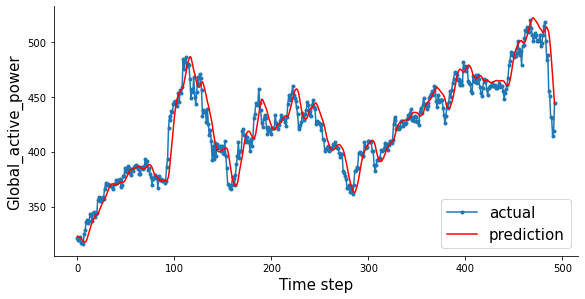

In [160]:
import seaborn as sns
aa=[x for x in range(493)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:493], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:493], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();